In [1]:
# import dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# connect to API key
ckey = "c3c7837f76a061a6b169ca1e0b35db71ba2b26c3"

In [2]:
# read zip codes csv
zipcodes_data = "clean_nyc_zips.csv" 
zipcodes_df = pd.read_csv(zipcodes_data)
zipcodes_df.head()

,NYC_Zip_Codes
0,10001
1,10002
2,10003
3,10004
4,10005


In [3]:
# Add columns for income
zipcodes_df["Avg Income ($)"] = ""


zipcodes_df.head()

,NYC_Zip_Codes,Avg Income ($)
0,10001,
1,10002,
2,10003,
3,10004,
4,10005,


In [4]:
#Pull income data by using US census API
base_url = "https://api.census.gov/data/2017/acs/acs5/profile"

avg_income = "DP03_0063E"   

for index, row in zipcodes_df.iterrows():    
    
    zip = row['NYC_Zip_Codes']
    
    query_url = f"{base_url}?get={avg_income},NAME&for=zip%20code%20tabulation%20area:{zip}&key={ckey}"
    
    try:
        response = requests.get(query_url).json()
        #pprint(response)
        print(f"Finding demo data for zip code: {zip}")
        
        zipcodes_df.loc[index, "Avg Income ($)"] = response[1][0]
        
        
    
    except json.decoder.JSONDecodeError:
        print("Missing field/result... skipping.")
        
    print("-------------------------------------------")

Finding demo data for zip code: 10001
-------------------------------------------
Finding demo data for zip code: 10002
-------------------------------------------
Finding demo data for zip code: 10003
-------------------------------------------
Finding demo data for zip code: 10004
-------------------------------------------
Finding demo data for zip code: 10005
-------------------------------------------
Finding demo data for zip code: 10006
-------------------------------------------
Finding demo data for zip code: 10007
-------------------------------------------
Finding demo data for zip code: 10009
-------------------------------------------
Finding demo data for zip code: 10010
-------------------------------------------
Finding demo data for zip code: 10011
-------------------------------------------
Finding demo data for zip code: 10012
-------------------------------------------
Finding demo data for zip code: 10013
-------------------------------------------
Finding demo dat

Finding demo data for zip code: 11214
-------------------------------------------
Finding demo data for zip code: 11215
-------------------------------------------
Finding demo data for zip code: 11216
-------------------------------------------
Finding demo data for zip code: 11217
-------------------------------------------
Finding demo data for zip code: 11218
-------------------------------------------
Finding demo data for zip code: 11219
-------------------------------------------
Finding demo data for zip code: 11220
-------------------------------------------
Finding demo data for zip code: 11221
-------------------------------------------
Finding demo data for zip code: 11222
-------------------------------------------
Finding demo data for zip code: 11223
-------------------------------------------
Finding demo data for zip code: 11224
-------------------------------------------
Finding demo data for zip code: 11225
-------------------------------------------
Finding demo dat

In [5]:
# output data frame with info added in new columns
#print(len(zipcodes_df))
zipcodes_df.head(10)



,NYC_Zip_Codes,Avg Income ($)
0,10001,161227
1,10002,65718
2,10003,182531
3,10004,191760
4,10005,201734
5,10006,196771
6,10007,376573
7,10009,90253
8,10010,177950
9,10011,197050


In [2]:
zipcodes_df.to_csv("zips_with_income.csv",index=False,header=True)

NameError: name 'zipcodes_df' is not defined

In [5]:
fine_dine_df = pd.read_csv("mich_rests.csv")
income_zip_df = pd.read_csv("zips_with_income.csv")
fine_dine_df.head(10)

,Unnamed: 0,name,address,city,state,description,star,full_address,postal_code
0,1,Sushi Inoue,381 Lenox Ave,New York,NY,ONE STAR for this Japanese restaurant in Harlem.,1,"381 Lenox Ave, New York, NY 10027",10027
1,2,Dovetail,103 W 77th St,New York,NY,John Fraser's UWS fine dining restaurant has O...,1,"103 W 77th St, New York, NY 10024",10024
2,3,Cafe Boulud,20 E 76th St,New York,NY,Daniel Boulud's beloved Upper East Side restau...,1,"20 E 76th St, New York, NY 10021",10021
3,4,Jean-Georges,1 Central Park West,New York,NY,Jean-Georges Vongerichten's flagship restauran...,2,"1 Central Park West, New York, NY 10023",10023
4,5,Masa,10 Columbus Cir,New York,NY,Masa Takayama's pricey sushi restaurant has TH...,3,"10 Columbus Cir, New York, NY 10019",10019
5,7,Marea,240 Central Park S,New York,NY,Michael White's Central Park South Italian sea...,2,"240 Central Park S, New York, NY 10019",10019
6,8,Daniel,60 E 65th St,New York,NY,Daniel Boulud's Upper East Side French restaur...,2,"60 E 65th St, New York, NY 10065",10065
7,9,Torishin,362 W 53rd St,New York,NY,This terrific izakaya has ONE STAR.,1,"362 W 53rd St, New York, NY 10019",10019
8,10,Le Bernardin,155 W 51st St,New York,NY,Eric Ripert's beloved seafood restaurant has T...,3,"155 W 51st St, New York, NY 10019",10019
9,11,The Modern,9 W 53rd St,New York,NY,Danny Meyer's Midtown restaurant with chef Abr...,2,"9 W 53rd St, New York, NY 10019",10019


In [6]:
postal_group = fine_dine_df.groupby('postal_code')

count_postal = postal_group['postal_code'].count()

count_restaurants_df = count_postal.rename_axis('NYC_Zip_Codes').reset_index(name='Michelin Counts')
count_restaurants_df.head()



,NYC_Zip_Codes,Michelin Counts
0,10001,2
1,10002,2
2,10003,7
3,10009,1
4,10010,4


In [10]:
# Merge two dataframes using an inner join
merge_table = pd.merge(income_zip_df, count_restaurants_df, on="NYC_Zip_Codes",how = "left")
merge_table.max()


NYC_Zip_Codes       11697.0
Avg Income ($)     376573.0
Michelin Counts         8.0
dtype: float64

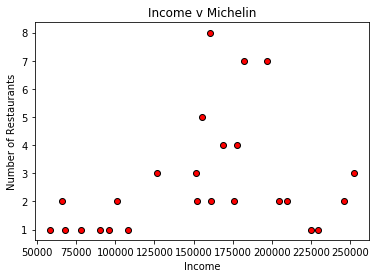

In [12]:
income = merge_table['Avg Income ($)']
rest_count = merge_table['Michelin Counts']
plt.scatter(income, rest_count, marker="o", facecolors="red", edgecolors="black")


# Create a title, x label, and y label for our chart
plt.title("Income v Michelin")
plt.xlabel("Income")
plt.ylabel("Number of Restaurants")

plt.show()





In [ ]:
width = .35 # width of a bar

merge_table[['Avg Income ($)','NYC_Zip_Codes']].plot(kind='bar',color ='y',width= width)
merge_table['Michelin Counts'].plot(secondary_y = True)

ax = plt.gca()
ax.set_xticklabels(merge_table['NYC_Zip_Codes'])
tick_locations = [value for value in merge_table['NYC_Zip_Codes']]
plt.xlim(-0.5,len(merge_table['NYC_Zip_Codes']-0.25))
pltylim(0,max(merge_table['Avg Income ($)'])+0.4)

plt.show()